
<img src="./img/escom.png" alt="escom logo" align="right" width="200"/>

# Image Algebra
<p><strong>Absalom Herrera Ramírez<br/>
    2016630552<br/>3CV7</strong></p>

#### We load the images we are gonna use

In [1]:
from PIL import Image
filepath =  "./img/"
img1 = Image.open(filepath+"big_tree.jpeg")
img2 = Image.open(filepath+"sign.jpeg")

#### We convert the images to numpy arrays

In [2]:
import numpy as np
img1 = np.asarray(img1)
img2 = np.asarray(img2)

#### Showing the images and its size

Text(0.5, 0.98, 'Images')

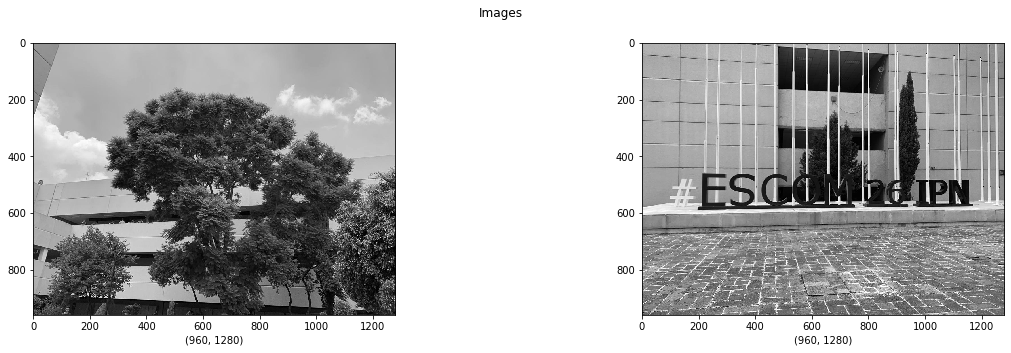

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# If the image is not grayscale
def to_grayscale(img_arr):
    gray_img = img_arr.dot([.2126, .7152, .0722])
    return gray_img.astype(np.uint8)

if (len(img1.shape) > 2):
    img1 = to_grayscale(img1)
if (len(img2.shape) > 2):
    img2 = to_grayscale(img2)

fig, axs = plt.subplots(1, 2, figsize=(20,5), sharey=False)
axs[0].imshow(img1, cmap="gray")
axs[0].set_xlabel(img1.shape)
axs[1].imshow(img2, cmap="gray")
axs[1].set_xlabel(img2.shape)
fig.suptitle('Images')

## Grayscale and colored image algebra operations

For the implementation of this functions we will use cython for a better performance.

In [4]:
%load_ext Cython

#### Addition and substraction
These operations must be performed between images of the same size because it's done elementwise. We store the result on an image where $Res(i, j)=Img(i, j) + Img2(i, j)$.

<img src="./img/addition.png" alt="add sub image" align="center" width="350"/>

In [5]:
%%cython
import numpy as np
cimport numpy as np

def add_grayscale_img (np.ndarray[np.uint8_t, ndim=2]  img1, np.ndarray[np.uint8_t, ndim=2] img2):
    cdef Py_ssize_t i, j
    cdef int height
    cdef int width
    cdef float temp
    height = img1.shape[0]
    width = img1.shape[1]
    cdef np.ndarray res = np.zeros([height, width], dtype=np.uint8)
    for i in range(height):
        for j in range(width):
            temp = float(img1[i, j]) + float(img2[i, j])
            if temp > 255:
                temp = 255
            elif temp < 0:
                temp = 0
            res[i, j] = int(temp)
    return res

def sub_grayscale_img (np.ndarray[np.uint8_t, ndim=2]  img1, np.ndarray[np.uint8_t, ndim=2] img2):
    cdef Py_ssize_t i, j
    cdef int height
    cdef int width
    cdef float temp
    height = img1.shape[0]
    width = img1.shape[1]
    cdef np.ndarray res = np.zeros([height, width], dtype=np.uint8)
    for i in range(height):
        for j in range(width):
            temp = float(img1[i, j]) - float(img2[i, j])
            if temp < 0:
                temp = 0
            res[i, j] = int(temp)
    return res

Text(0.5, 0.98, 'Image substraction and addition')

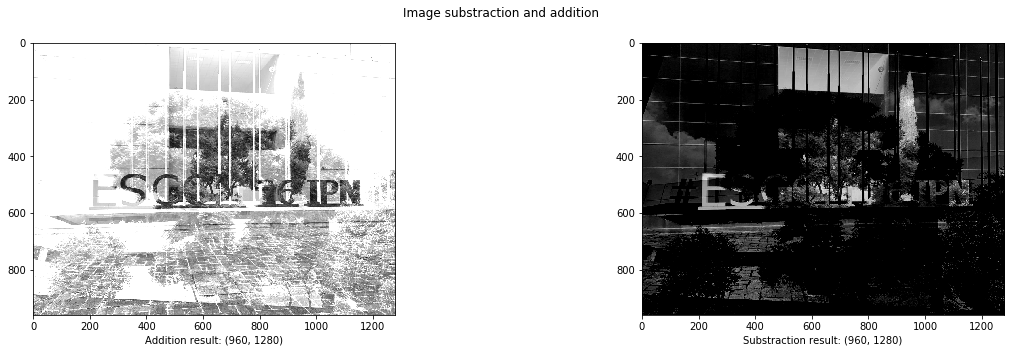

In [6]:
res_img1 = add_grayscale_img(img1, img2)
res_img2 = sub_grayscale_img(img1, img2)
fig, axs = plt.subplots(1, 2, figsize=(20,5), sharey=False)
axs[0].imshow(res_img1, cmap="gray")
axs[0].set_xlabel("Addition result: " + str(res_img1.shape))
axs[1].imshow(res_img2, cmap="gray")
axs[1].set_xlabel("Substraction result: " + str(res_img2.shape))
fig.suptitle('Image substraction and addition')

#### Scalar multiplication
The scalar multiplication of an image $A$ with a scalar $\lambda$ gives another matrix $\lambda A$ of the same size as $A$. The entries of $\lambda A$ are defined by: $(\lambda A)_{ij} = \lambda (A)_{ij}$

<img src="./img/scalar_multi.jpeg" alt="scalar multiplication" align="center" width="300"/>

In [7]:
%%cython
import numpy as np
cimport numpy as np

def scalar_multiplication(np.ndarray[np.uint8_t, ndim=2]  img, char scalar):
    cdef Py_ssize_t i, j
    cdef int height = img.shape[0]
    cdef int width = img.shape[1]
    cdef float temp
    res = np.zeros([height, width], dtype=np.uint8)
    for i in range(height):
        for j in range(width):
            temp = float(img[i, j]) * scalar
            if temp > 255:
                temp = 255
            elif temp < 0:
                temp = 0
            res[i, j] = int(temp)
    return res

Text(0.5, 0.98, 'Images')

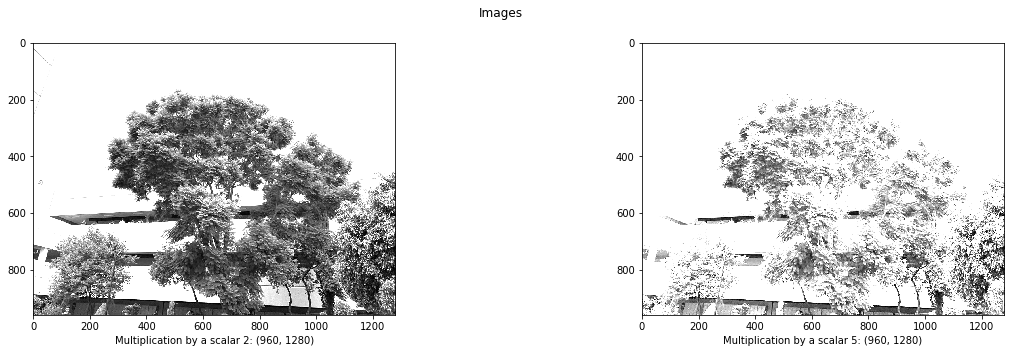

In [8]:
scalar1 = 2
scalar2 = 5
res_img1 = scalar_multiplication(img1, scalar1)
res_img2 = scalar_multiplication(img1, scalar2)
fig, axs = plt.subplots(1, 2, figsize=(20,5), sharey=False)
axs[0].imshow(res_img1, cmap="gray")
axs[0].set_xlabel("Multiplication by a scalar "+ str(scalar1) + ": " + str(res_img1.shape))
axs[1].imshow(res_img2, cmap="gray")
axs[1].set_xlabel("Multiplication by a scalar "+ str(scalar2) + ": " + str(res_img2.shape))
fig.suptitle('Images')

## Opetarions on binary images
A binary image is a digital image that has only two possible values for each pixel. Typically, the two colors used for a binary image are black and white.

Text(0.5, 0.98, 'Binary images')

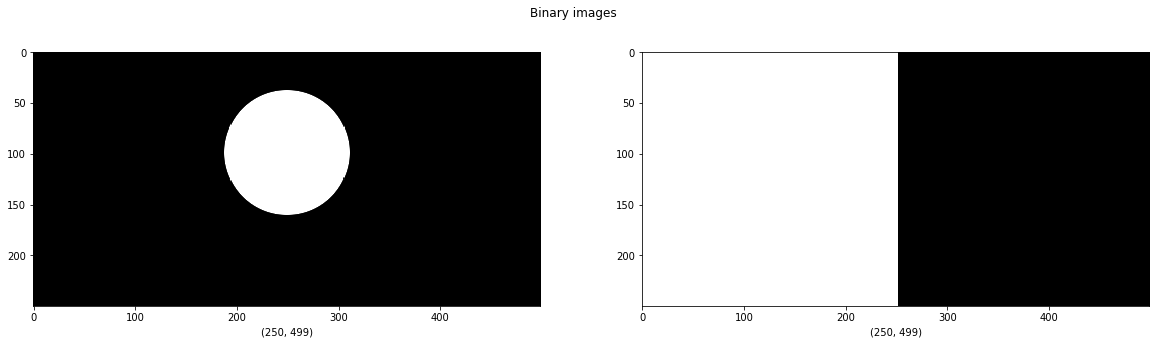

In [17]:
bimg1 = Image.open(filepath+"binary.png")
bimg2 = Image.open(filepath+"binary2.png")
bimg1 = np.asarray(bimg1)
bimg2 = np.asarray(bimg2)
if (len(bimg1.shape) > 2):
    bimg1 = to_grayscale(bimg1)
if (len(bimg2.shape) > 2):
    bimg2 = to_grayscale(bimg2)
fig, axs = plt.subplots(1, 2, figsize=(20,5), sharey=False)
axs[0].imshow(bimg1, cmap="gray")
axs[0].set_xlabel(bimg1.shape)
axs[1].imshow(bimg2, cmap="gray")
axs[1].set_xlabel(bimg2.shape)
fig.suptitle('Binary images')

#### Intersection (AND)

In [23]:
%%cython
import numpy as np
cimport numpy as np

def and_img(np.ndarray[np.uint8_t, ndim=2]  img1, np.ndarray[np.uint8_t, ndim=2] img2):
    cdef Py_ssize_t i, j
    cdef int height = img1.shape[0]
    cdef int width = img1.shape[1]
    res = np.zeros([height, width], dtype=np.uint8)
    for i in range(height):
        for j in range(width):
            res[i, j] = img1[i, j] & img2[i, j]
    return res

Text(0.5, 0.98, 'AND')

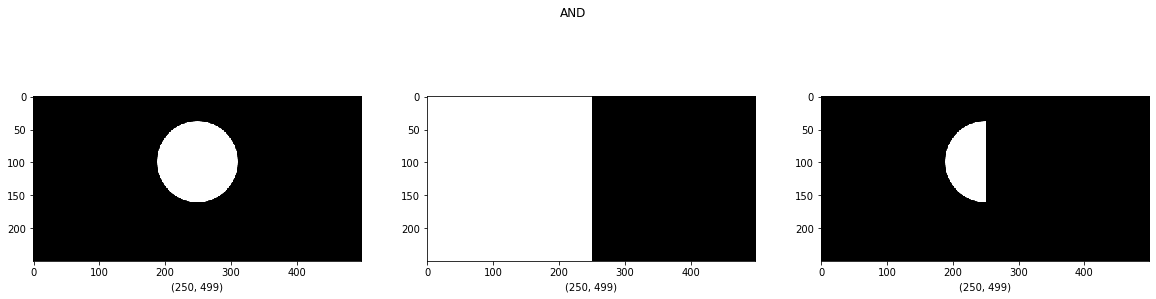

In [24]:
and_res = and_img(bimg1, bimg2)
fig, axs = plt.subplots(1, 3, figsize=(20,5), sharey=False)
axs[0].imshow(bimg1, cmap="gray")
axs[0].set_xlabel(bimg1.shape)
axs[1].imshow(bimg2, cmap="gray")
axs[1].set_xlabel(bimg2.shape)
axs[2].imshow(and_res, cmap="gray")
axs[2].set_xlabel(and_res.shape)
    fig.suptitle('INTERSECTION (AND)')

#### Union (OR)

In [25]:
%%cython
import numpy as np
cimport numpy as np

def or_img(np.ndarray[np.uint8_t, ndim=2]  img1, np.ndarray[np.uint8_t, ndim=2] img2):
    cdef Py_ssize_t i, j
    cdef int height = img1.shape[0]
    cdef int width = img1.shape[1]
    res = np.zeros([height, width], dtype=np.uint8)
    for i in range(height):
        for j in range(width):
            res[i, j] = img1[i, j] | img2[i, j]
    return res

Text(0.5, 0.98, 'AND')

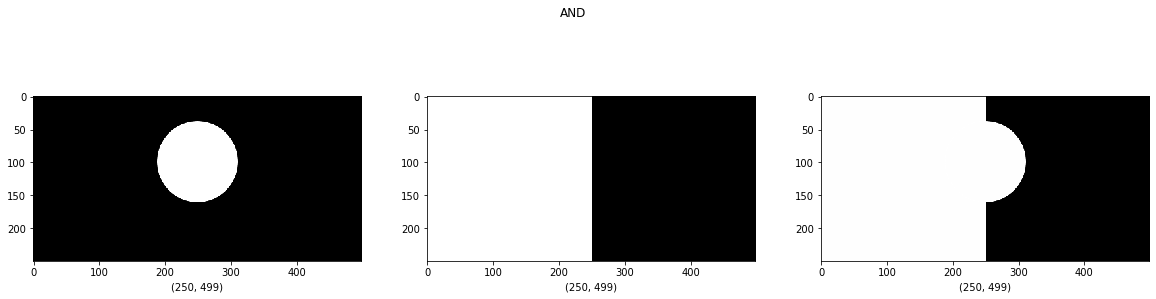

In [27]:
or_res = or_img(bimg1, bimg2)
fig, axs = plt.subplots(1, 3, figsize=(20,5), sharey=False)
axs[0].imshow(bimg1, cmap="gray")
axs[0].set_xlabel(bimg1.shape)
axs[1].imshow(bimg2, cmap="gray")
axs[1].set_xlabel(bimg2.shape)
axs[2].imshow(or_res, cmap="gray")
axs[2].set_xlabel(or_res.shape)
fig.suptitle('UNION (OR)')

#### Complement

In [39]:
%%cython
import numpy as np
cimport numpy as np

def compliment_img(np.ndarray[np.uint8_t, ndim=2]  img):
    cdef Py_ssize_t i, j
    cdef int height = img.shape[0]
    cdef int width = img.shape[1]
    res = np.zeros([height, width], dtype=np.uint8)
    for i in range(height):
        for j in range(width):
            res[i, j] =  ~img[i, j]
    return res

(250, 499)


Text(0.5, 0.98, 'COMPLIMENT')

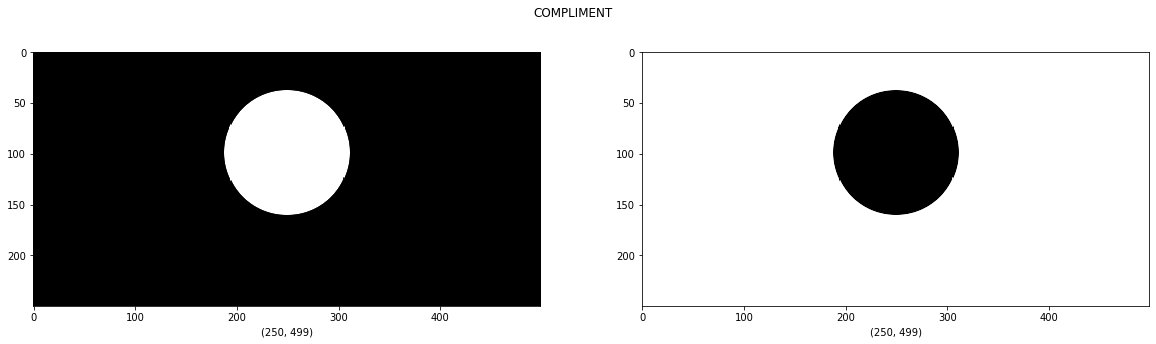

In [40]:
print(bimg1.shape)
compliment_res = compliment_img(bimg1)
fig, axs = plt.subplots(1, 2, figsize=(20,5), sharey=False)
axs[0].imshow(bimg1, cmap="gray")
axs[0].set_xlabel(bimg1.shape)
axs[1].imshow(compliment_res, cmap="gray")
axs[1].set_xlabel(compliment_res.shape)
fig.suptitle('COMPLIMENT')

## Convolution
Convolution is one of the most important operations in image processing. Generally, we can consider an image as a matrix whose elements are numbers between 0 and 255. The size of this matrix is (image height) x (image width) x (# of image channels). A grayscale image has 1 channel where a color image has 3 channels (for an RGB). 

Each convolution operation has a kernel which could be a any matrix smaller than the original image in height and width. Each kernel is useful for a spesific task, such as sharpening, blurring, edge detection, and more.

The output of image convolution is calculated as follows:

- Flip the kernel both horizontally and vertically. As our selected kernel is symetric, the flipped kernel is equal to the original.
- Put the first element of the kernel at every pixel of the image (element of the image matrix). Then each element of the kernel will stand on top of an element of the image matrix.

<img src="./img/conv.jpeg" alt="convolution" align="center" width="400"/>

In [70]:
%%cython
import numpy as np
cimport numpy as np

def convolve(np.ndarray[np.uint8_t, ndim=2]  img, np.ndarray[np.int8_t, ndim=2]  kernel):
    cdef Py_ssize_t i, j
    cdef int i_height = img.shape[0]
    cdef int i_width = img.shape[1]
    cdef int k_height = kernel.shape[0]
    cdef int k_width = kernel.shape[1]
    res = np.zeros([i_height, i_width], dtype=np.uint8)
    # flippig the kernel
    kernel = np.flipud(np.fliplr(kernel))
    # image with padding
    padding = (k_width - 1) // 2
    image_padded = np.zeros((i_height + padding, i_width + padding))   
    image_padded[padding:-1, padding:-1] = img
    for i in range(i_height):     # Loop over every pixel of the image
        for j in range(i_width):
            # element-wise multiplication of the kernel and the image
            res[i, j]=(kernel*image_padded[i:i + padding + 1, j:j + padding + 1]).sum()        
    return res

In [71]:
k = np.array([[8,-1]], dtype=np.int8)
res_conv = convolve(img1, k)
fig, axs = plt.subplots(1, 2, figsize=(20,5), sharey=False)
axs[0].imshow(img1, cmap="gray")
axs[0].set_xlabel(img1.shape)
axs[1].imshow(res_conv, cmap="gray")
axs[1].set_xlabel(res_conv.shape)
fig.suptitle('CONVOLUTION')

ValueError: could not broadcast input array from shape (960,1280) into shape (959,1279)